# Lesson 2 | Basic Pandas


### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Importing data with pandas
- Run basic data exploration analysis.
- Change data types and find outliers.
- Filter pandas dataframes.
- Create simple reports to summerize data. 

# Table of Contents
1. [What is Pandas](#whatis)
2. [Import data using Pandas](#import)
3. [Pandas Data Frame & Basic EDA](#basiceda)
4. [Filtering Data Frame](#filtdata)
5. [Adding new column or Row](#newcol)
6. [Groupby and agg](#groupby)
7. [Merge](#merge)

# 1. What is Pandas?<a class="anchor" id="whatis"></a>

## These are pandas:
![SegmentLocal](Images/pandas.gif "segment")

## But not the one we will learn today!

## Pandas ~ Excel
I would say that pandas is the closest from a excel table that you can get using python.

It is an open source library written in Python for data manipulation and analysis, it's initial release was in 2008, it was initially developed out of the need of high performance to run quantative analysis on finantial data. Pandas was build on using a Python library called Numpy. Numpy is a library used to support large multi-dimentional arrays and matrices, it is very popular in the sientific community.
![title](./Images/pandas_description.png)

source: https://pandas.pydata.org/, https://en.wikipedia.org/wiki/Pandas_(software)

# 2. Import data using Pandas <a class="anchor" id="import"></a>
- In order to use the pandas pakage we will need to import it. `Import pandas`
- We add the `as pd` after the import in order to use the variable `pd` to refer to the pandas pakage. This way we are able to acess all the methods and functions of this class by only typing `pd` instead of `pandas`.

In [1]:
import pandas as pd

## Works with multiple file types:
#### Excel, CSV, Json, Pickle, txt, XML, HTML, parquet 

-  Here are some examples:
- `pd.read_csv(file_path + 'file_name.csv', sep=',')`

- `pd.read_excel(file_path + 'file_name.xls', sheet='sheet_name')`

- `pd.read_sql('select * from my_table', connection)`

If the file is saved in the same folder as the code you are running you don't need to add the file path.

##### Relative path vs absolute path
 - I recommended to use absolute path, the absolute path 

In [ ]:
# Absolute path WILL NOT WORK!!!
abs_path = 'C:/Users/berku/Desktop/DSI/Personal Git Hub/python_lessons/Class 2/data/'

# The file can be imported with the absolute or relative path
df = pd.read_csv(abs_path + 'netflix_titles.csv')

In [3]:
# Relative path WILL WORK!!
# The file can be imported with the absolute or relative path
rel_path = './data/'
df = pd.read_csv(rel_path + 'netflix_titles.csv')

#### Common arguments:
- **usecols** => If you don't need all the columns in the dataframe.
- **dtype** => Change data types.
- **parse_dates** => Read column as date time.

In [4]:
# Usecols:
df = pd.read_csv(rel_path + 'netflix_titles.csv', 
                 usecols=['show_id','type','date_added', 'release_year']
                )
df.head(1)

,show_id,type,date_added,release_year
0,81145628,Movie,"September 9, 2019",2019


In [5]:
# dtype and parse_dates and Usecols
df = pd.read_csv(rel_path + 'netflix_titles.csv', 
                 usecols=['show_id','type','date_added', 'release_year'], 
                 dtype={'show_id': int, 'type': str, 'release_year': float}, 
                 parse_dates=['date_added'])
df.head(1)

,show_id,type,date_added,release_year
0,81145628,Movie,2019-09-09,2019.0


#### Import we will use for this project

In [9]:
rel_path = './data/'
df = pd.read_csv(rel_path + 'netflix_titles.csv', 
                 parse_dates=['date_added'])

# 3.Pandas Data Frame & Basic EDA <a class="anchor" id="basiceda"></a>

### Who Loves movies ??
#### We will explore a Data Base with Movies and TV Shows that were listed on Netflix.

<img src="./Images/netflix2.jpg" alt="Drawing" style="width: 200px;"/>

### Pandas Data Frame
A pandas DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.

**Structure:**
![title](./Images/pandas_dataframe.png)


## Use .head(), .sample() or .tail() to look at part of the data

In [ ]:
# Check out the difference between
df.head()
df.tail()a
df.sample()

### Selecting Data From specfic rows / columns
- df[list of column names separated by commas]
- df.loc[row index, column names]

In [17]:
# Select a single column
df['release_year']

0       2019
1       2016
2       2013
3       2016
4       2017
        ... 
6229    2015
6230    2016
6231    2016
6232    2013
6233    2003
Name: release_year, Length: 6234, dtype: int64

In [18]:
# select multiple columns
df[['show_id', 'type', 'title', 'director']].head(1)

,show_id,type,title,director
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby"


### EDA = exploratory data analysis

EDA is about getting to know more about your data finding its main characteristics.
When working with a new data set I would recomment running at least the methods below:

- **shape**<br />
Returns a tuple with number of rows and columns of the data frame.
- **dtypes**<br />
Are the data types what we expect them to be?<br />
- **describe**<br />
Will Describe create basis statistics. Default is to calculate it only for numeric columns.
- **value_counts**<br />
For a given column counts the occurrence of values.
- **info** gives you non null counts for each column and memory usage<br />
- **sort_values** to sort column values ascending or descending.<br />
- **.isnull().sum()** sum of null rows for each column
- **nunique() and unique()** Count or visualize unique values for a column.
- **drop_duplicates()** Drops duplicates of a subset of columns
- **sum, mean, min, max, mode, std, median**
### Run the examples below:

In [19]:
df.shape

(6234, 12)

In [23]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...


In [21]:
df.dtypes

show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

**3.1 Practice** Are the column data types what we expect them to be?
- Yes
- No

In [24]:
# Will run it on only numeric columns
df.describe() 

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [25]:
# Will run it on only object columns
df.describe(include='O')

,type,title,director,cast,country,rating,duration,listed_in,description
count,6234,6234,4265,5664,5758,6224,6234,6234,6234
unique,2,6172,3301,5469,554,14,201,461,6226
top,Movie,The Silence,"Raúl Campos, Jan Suter",David Attenborough,United States,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,4265,3,18,18,2032,2027,1321,299,3


In [26]:
# Will run it on only date columns
df.describe(include='datetime64[ns]')

,date_added
count,6223
unique,1189
top,2020-01-01 00:00:00
freq,126
first,2008-01-01 00:00:00
last,2020-01-18 00:00:00


In [27]:
df['release_year'].sort_values(ascending=[True])

4292    1925
2011    1942
2013    1942
2022    1943
2023    1943
        ... 
3189    2020
3180    2020
1315    2020
3379    2020
3464    2020
Name: release_year, Length: 6234, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6234 non-null   int64         
 1   type          6234 non-null   object        
 2   title         6234 non-null   object        
 3   director      4265 non-null   object        
 4   cast          5664 non-null   object        
 5   country       5758 non-null   object        
 6   date_added    6223 non-null   datetime64[ns]
 7   release_year  6234 non-null   int64         
 8   rating        6224 non-null   object        
 9   duration      6234 non-null   object        
 10  listed_in     6234 non-null   object        
 11  description   6234 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 584.6+ KB


In [29]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [30]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [32]:
df['country'].nunique()

554

In [31]:
df['country'].unique()

Number of unique country combination is: 554


array(['United States, India, South Korea, China', 'United Kingdom',
       'United States', 'Spain', 'Bulgaria, United States, Spain, Canada',
       'Chile', 'United States, United Kingdom, Denmark, Sweden', nan,
       'Netherlands, Belgium, United Kingdom, United States',
       'France, Belgium', 'United States, Uruguay', 'United States,',
       'Thailand', 'China, Canada, United States',
       'Belgium, United Kingdom, United States', 'Belgium, France',
       'India', 'France', 'United States, Canada', 'Pakistan', 'Canada',
       'United Kingdom, France', 'United States, United Kingdom',
       'South Korea', 'Denmark, United States',
       'United Kingdom, United States', 'Turkey, United States', 'Brazil',
       'Denmark, France, Italy, Belgium, Netherlands', 'Indonesia',
       'China', 'Ireland, United Kingdom', 'Turkey', 'Hong Kong',
       'France, Morocco', 'Hong Kong, China', 'Mexico',
       'United States, Mexico', 'Vietnam', 'France, Canada',
       'Spain, Argent

In [60]:
df['type'].head()

0      Movie
1      Movie
2    TV Show
3    TV Show
4      Movie
Name: type, dtype: object

In [56]:
df[['type']]

,type
0,Movie
1,Movie
2,TV Show
3,TV Show
4,Movie
...,...
6229,TV Show
6230,TV Show
6231,Movie
6232,TV Show


In [39]:
type(df)

pandas.core.frame.DataFrame

In [35]:
df['type'].drop_duplicates()

0      Movie
2    TV Show
Name: type, dtype: object

In [37]:
df['release_year'].max()

2020

In [36]:
df['release_year'].median()

2016.0

**3.2 Practice** Using the describe method answer the following questions:
- What date had the most number of movies added?
- What is the oldest release date for movie or tv show?
- Are there movies with the same description text?

**3.3 Practice** What are the 3 directors with highest number of shows in netflix.

# 4. Filtering Data <a class="anchor" id="filtdata"></a> 
To understand this we will need to learn about.
 - Panda series<br />
   Similar to a column in excel, is a one dimentional array with a single data type.   
 - Using a boolean mask on a Panda Series<br />
   We can create boolean list with the same lenght as the series to filter the panda series 
   using the [] acessor.
 - Using a Boolean mask on a Pandas DataFrame<br />

In [61]:
my_series = df['release_year'].head()

print(type(df['release_year']))
print('----------------------')
print(my_series)

<class 'pandas.core.series.Series'>
----------------------
0    2019
1    2016
2    2013
3    2016
4    2017
Name: release_year, dtype: int64


In [62]:
my_series = df['release_year'].head()
my_series

0    2019
1    2016
2    2013
3    2016
4    2017
Name: release_year, dtype: int64

In [65]:
# We can create boolean list with the same lenght as the series to filter the panda series.
bool_mask = [True, False, False, False, False]

# Using 
my_series[bool_mask]

0    2019
Name: release_year, dtype: int64

In [66]:
my_series > 2016

0     True
1    False
2    False
3    False
4     True
Name: release_year, dtype: bool

In [67]:
my_series[my_series > 2016] # Yields the same results.

0    2019
4    2017
Name: release_year, dtype: int64

In [68]:
# The same can be done in the dataframe, 
# First we create a boolean mask based on a column for example
my_mask = df['release_year'] > 2016
print(my_mask)

0        True
1       False
2       False
3       False
4        True
        ...  
6229    False
6230    False
6231    False
6232    False
6233    False
Name: release_year, Length: 6234, dtype: bool


In [73]:
# Second use the [] acessor to filter the data frame
df[(df['release_year'] > 2016)]['release_year'].unique()

array([2019, 2017, 2018, 2020], dtype=int64)

In [76]:
# filtering data frame with multiple conditions
df[(df['country']=='United States')
    & (df['release_year'] == 1988)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
369,70208520,TV Show,High Risk,NaN,NaN,United States,2017-09-01,1988,TV-G,1 Season,"Docuseries, Reality TV","From scientists to snake handlers, this series..."
989,70206821,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,2011-10-01,1988,NR,95 min,Dramas,"After reckless teens kill an Amish child, a pr..."
993,70206819,Movie,Quiet Victory: The Charlie Wedemeyer Story,Roy Campanella II,"Pam Dawber, Michael Nouri, Bess Meyer, Peter B...",United States,2011-10-01,1988,TV-PG,93 min,"Dramas, Sports Movies",When high school football coach Charlie Wedeme...
996,70206823,Movie,Too Young the Hero,Buzz Kulik,"Ricky Schroder, Jon DeVries, Debra Mooney, Mar...",United States,2011-10-01,1988,NR,94 min,Dramas,Twelve-year-old Calvin manages to join the nav...
1428,60003961,Movie,"Thelonious Monk: Straight, No Chaser",Charlotte Zwerin,"Thelonious Monk, Samuel E. Wright",United States,2019-11-01,1988,PG-13,89 min,"Documentaries, Music & Musicals",The spotlight shines on iconic jazz pianist an...
3071,60029369,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,1988,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...
3584,60001807,Movie,The Naked Gun: From the Files of Police Squad!,David Zucker,"Leslie Nielsen, Priscilla Presley, Ricardo Mon...",United States,2020-01-01,1988,PG-13,85 min,"Comedies, Cult Movies","In this slapstick comedy classic, hapless cop ..."
4187,372195,Movie,Child's Play,Tom Holland,"Catherine Hicks, Alex Vincent, Brad Dourif, Ch...",United States,2019-12-31,1988,R,87 min,"Cult Movies, Horror Movies","When a rash of murders unfolds, 6-year-old And..."
4456,80023921,Movie,Pee-wee's Playhouse: Christmas Special,"Paul Reubens, Wayne Orr","Paul Reubens, Annette Funicello, Frankie Avalo...",United States,2014-12-18,1988,TV-PG,48 min,Movies,"Amid an avalanche of stars, Pee-wee straps on ..."
5774,70157402,TV Show,Highway to Heaven,NaN,"Michael Landon, Victor French",United States,2016-11-01,1988,TV-PG,5 Seasons,TV Dramas,"Under God's direction, angel Jonathan and ex-c..."


In [77]:
# filtering data frame with multiple conditions
df[(df['description'].str.contains('panda'))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1989,80224924,Movie,Expedition China,Ben Wallis,Maggie Q,NaN,2018-03-04,2017,G,78 min,Documentaries,Cinematographers visit the remote forests and ...
5703,80171004,TV Show,Noddy Toyland Detective,NaN,NaN,"France, United Kingdom, United States",2017-10-01,2016,TV-Y,2 Seasons,Kids' TV,"Toyland’s boy detective, Noddy, solves mysteri..."


In [79]:
# filtering data frame with multiple conditions
df[(df['title'].str.len() < 10)
   | (df['release_year'] < df['release_year'].mean())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,2017-09-08,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
12,80182480,Movie,Krish Trish and Baltiboy,NaN,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,2017-09-08,2009,TV-Y7,58 min,Children & Family Movies,"A team of minstrels, including a monkey, cat a..."
13,80182483,Movie,Krish Trish and Baltiboy: Battle of Wits,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,2017-09-08,2013,TV-Y7,62 min,Children & Family Movies,"An artisan is cheated of his payment, a lion o..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6226,70243132,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
6228,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


AttributeError: 'AxesSubplot' object has no attribute 'show'

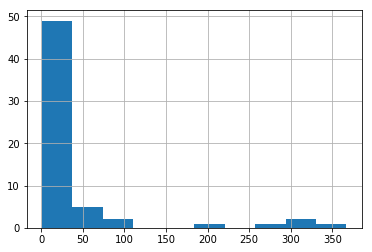

In [93]:
df[(df['listed_in'].str.contains('Dramas'))
  ]['release_year'].value_counts().sort_index(ascending=False).show

In [86]:
df['listed_in'].value_counts(normalize=True)

Documentaries                                                 0.047963
Stand-Up Comedy                                               0.043792
Dramas, International Movies                                  0.039782
Dramas, Independent Movies, International Movies              0.029836
Comedies, Dramas, International Movies                        0.027911
                                                                ...   
British TV Shows, Romantic TV Shows, TV Dramas                0.000160
Anime Features, Romantic Movies                               0.000160
Docuseries, Spanish-Language TV Shows                         0.000160
Classic Movies, Comedies, Romantic Movies                     0.000160
Crime TV Shows, TV Action & Adventure, TV Sci-Fi & Fantasy    0.000160
Name: listed_in, Length: 461, dtype: float64

In [81]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


**4.1 Practice** 
- Filter and order the 5 most recent TV Shows released in spain.
- Using values counts and filtering the data frame. Display the the top 10 realease_years that had the most Movies or TV shows that contain the word love in their description.

# 5. Adding new column or Row <a class="anchor" id="newcol"></a> 

We can create a new column based on an existing one or based on a list with the same size as the lenght of the data frame.


In [ ]:
df['release_year_plus1'] = df['release_year'] + 1

### Deep dive into .loc and basic .iloc

In [ ]:
# other way to select multiple columns
# df.loc[:, 'show_id':'director']

# Returns values for all columns regarding row index 2
# df.loc[2]

# 6. Groupby and agg  <a class="anchor" id="groupby"></a> 
# 7. Merge DataFrames <a class="anchor" id="merge"></a> 

**Practice 1.01**: Run the three cells below individually, than merge the cells and run it again.

In [ ]:
sales = 1 + 2

In [ ]:
sales

**Practice 6.01:** Write a function that returns True if a number is even and False if its odd.

## Final Practice

**1. Fizzbuzz**



### 7. Appendix
